In [1]:
import pandas as pd

In [15]:
import numpy as np

In [23]:
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Reading the file

In [4]:

# Path of the file to read
#csv_file_path = "D:/REDI/Data_Circle/data/training_set_values.csv"
csv_file_path = "/content/drive/MyDrive/Colab Notebooks/training_set_values.csv"
# Fill in the line below to read the file into a variable home_data
pump_data = pd.read_csv(csv_file_path)


In [7]:
#first five rows of the data
display(pump_data.head(5))
display(pump_data.tail(5))

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,14/03/2011,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,06/03/2013,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,25/02/2013,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,28/01/2013,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,13/07/2011,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
59395,60739,10.0,03/05/2013,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,...,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
59396,27263,4700.0,07/05/2011,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
59397,37057,0.0,11/04/2011,NaN,0,NaN,34.017087,-8.750434,Mashine,0,...,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
59398,31282,0.0,08/03/2011,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,...,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump
59399,26348,0.0,23/03/2011,World Bank,191,World,38.104048,-6.747464,Kwa Mzee Lugawa,0,...,on failure,salty,salty,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump


In [ ]:
# Get the summary statistics of the data
pump_data.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [8]:
print("Rows, Cols:", pump_data.shape)

Rows, Cols: (59400, 40)


In [10]:
print("\nDtypes:")
print(pump_data.dtypes)


Dtypes:
id                         int64
amount_tsh               float64
date_recorded             object
funder                    object
gps_height                 int64
installer                 object
longitude                float64
latitude                 float64
wpt_name                  object
num_private                int64
basin                     object
subvillage                object
region                    object
region_code                int64
district_code              int64
lga                       object
ward                      object
population                 int64
public_meeting            object
recorded_by               object
scheme_management         object
scheme_name               object
permit                    object
construction_year          int64
extraction_type           object
extraction_type_group     object
extraction_type_class     object
management                object
management_group          object
payment                   object
p

In [11]:
null_pct = pump_data.isna().mean().sort_values(ascending=False).to_frame("null_fraction")
display(null_pct.style.background_gradient(cmap="Reds").format("{:.1%}"))

,null_fraction
scheme_name,48.5%
scheme_management,6.5%
installer,6.2%
funder,6.1%
public_meeting,5.6%
permit,5.1%
subvillage,0.6%
wpt_name,0.0%
latitude,0.0%
longitude,0.0%


In [13]:
dup_any = pump_data.duplicated().sum()
print(f"\nDuplicate full rows: {dup_any}")


Duplicate full rows: 0


In [32]:
from re import I
# 6) Numeric summary
ID_COLUMNS = ["id","district_code","region_code"]
cat_cols = pump_data.select_dtypes(include=["object", "category"]).columns.tolist()
num_cols = pump_data.select_dtypes(include=[np.number]).columns.tolist()
if ID_COLUMNS:
    num_cols = [c for c in num_cols if c not in ID_COLUMNS]
if num_cols:
    print("\nNumeric columns:", num_cols[:15], "…" if len(num_cols) > 15 else "")
    display(pump_data[num_cols].describe().T)


Numeric columns: ['amount_tsh', 'gps_height', 'longitude', 'latitude', 'num_private', 'population', 'construction_year'] 


,count,mean,std,min,25%,50%,75%,max
amount_tsh,59400.0,317.650385,2997.574558,0.00000,0.000000,0.000000,20.000000,3.500000e+05
gps_height,59400.0,668.297239,693.116350,-90.00000,0.000000,369.000000,1319.250000,2.770000e+03
longitude,59400.0,34.077427,6.567432,0.00000,33.090347,34.908743,37.178387,4.034519e+01
latitude,59400.0,-5.706033,2.946019,-11.64944,-8.540621,-5.021597,-3.326156,-2.000000e-08
num_private,59400.0,0.474141,12.236230,0.00000,0.000000,0.000000,0.000000,1.776000e+03
population,59400.0,179.909983,471.482176,0.00000,0.000000,25.000000,215.000000,3.050000e+04
construction_year,59400.0,1300.652475,951.620547,0.00000,0.000000,1986.000000,2004.000000,2.013000e+03


In [34]:
# 7) Categorical summary (top categories + cardinality)
DATE_COLUMNS = ["date_recorded"]
cat_cols = pump_data.select_dtypes(include=["object", "category"]).columns.tolist()
if DATE_COLUMNS:
    # ensure we don’t treat parsed date columns as categorical
    cat_cols = [c for c in cat_cols if c not in DATE_COLUMNS]
if cat_cols:
    print("\nCategorical columns:", cat_cols[:15], "…" if len(cat_cols) > 15 else "")
    cat_card = pump_data[cat_cols].nunique().sort_values(ascending=False).to_frame("n_unique")
    display(cat_card.style.background_gradient(cmap="Blues"))
    # top values preview
    for c in cat_cols[:10]:
        print(f"\nTop values for {c}:")
        print(pump_data[c].value_counts(dropna=False).head(10))


Categorical columns: ['funder', 'installer', 'wpt_name', 'basin', 'subvillage', 'region', 'lga', 'ward', 'public_meeting', 'recorded_by', 'scheme_management', 'scheme_name', 'permit', 'extraction_type', 'extraction_type_group'] …


,n_unique
wpt_name,37399
subvillage,19287
scheme_name,2695
installer,2145
ward,2092
funder,1896
lga,125
region,21
extraction_type,18
extraction_type_group,13



Top values for funder:
funder
Government Of Tanzania    9084
NaN                       3637
Danida                    3114
Hesawa                    2202
Rwssp                     1374
World Bank                1349
Kkkt                      1287
World Vision              1246
Unicef                    1057
Tasaf                      877
Name: count, dtype: int64

Top values for installer:
installer
DWE           17402
NaN            3655
Government     1825
RWE            1206
Commu          1060
DANIDA         1050
KKKT            898
Hesawa          840
0               777
TCRS            707
Name: count, dtype: int64

Top values for wpt_name:
wpt_name
none               3563
Shuleni            1748
Zahanati            830
Msikitini           535
Kanisani            323
Bombani             271
Sokoni              260
Ofisini             254
School              208
Shule Ya Msingi     199
Name: count, dtype: int64

Top values for basin:
basin
Lake Victoria              10248
Pangani

In [35]:
# 8) Correlations (numeric)
corr = pump_data[num_cols].corr(numeric_only=True)
print("\nCorrelation (Pearson):")
display(corr.round(2))


Correlation (Pearson):


,amount_tsh,gps_height,longitude,latitude,num_private,population,construction_year
amount_tsh,1.00,0.08,0.02,-0.05,0.00,0.02,0.07
gps_height,0.08,1.00,0.15,-0.04,0.01,0.14,0.66
longitude,0.02,0.15,1.00,-0.43,0.02,0.09,0.40
latitude,-0.05,-0.04,-0.43,1.00,0.01,-0.02,-0.25
num_private,0.00,0.01,0.02,0.01,1.00,0.00,0.03
population,0.02,0.14,0.09,-0.02,0.00,1.00,0.26
construction_year,0.07,0.66,0.40,-0.25,0.03,0.26,1.00


In [36]:
# 9) Outlier hint: simple z-score flag on numeric columns
def outlier_share(series, z=3.0):
    s = series.dropna()
    if s.std(ddof=0) == 0:
        return 0.0
    zscores = (s - s.mean()) / s.std(ddof=0)
    return (np.abs(zscores) > z).mean()

outlier_report = []
for col in num_cols:
    share = outlier_share(pump_data[col], z=3.0)
    outlier_report.append((col, share))
outliers_df = pd.DataFrame(outlier_report, columns=["column", "outlier_fraction"]).sort_values("outlier_fraction", ascending=False)
print("\nOutlier fraction by column (|z|>3):")
display(outliers_df.head(20).style.format({"outlier_fraction": "{:.2%}"}).background_gradient(cmap="Oranges"))



Outlier fraction by column (|z|>3):


,column,outlier_fraction
2,longitude,3.05%
5,population,1.23%
0,amount_tsh,0.40%
4,num_private,0.39%
1,gps_height,0.00%
3,latitude,0.00%
6,construction_year,0.00%


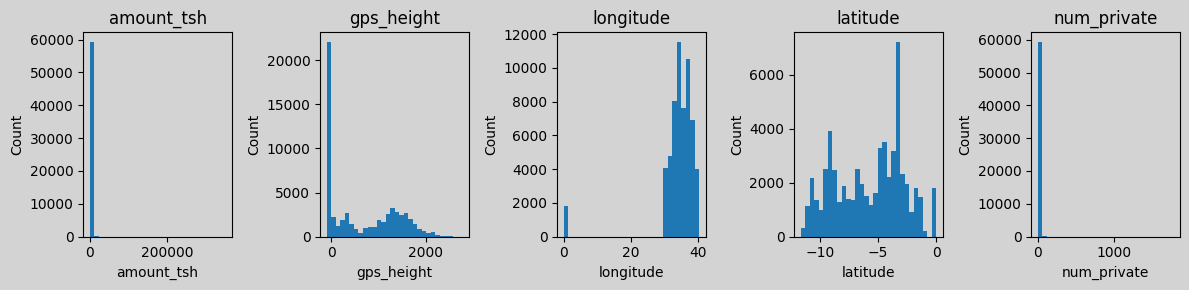

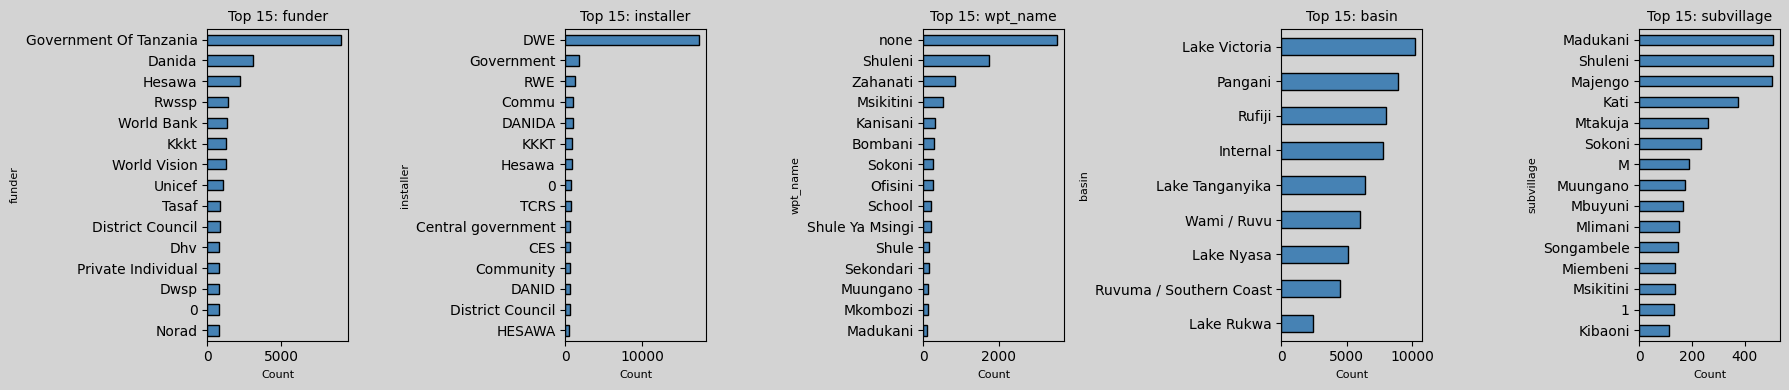

In [42]:
# 10) Quick plots (optional; remove if running in headless env)
# Histogram for first few numeric columns
cols_to_plot = num_cols[:5]   # first 5 numeric columns

fig, axes = plt.subplots(1, 5, figsize=(12, 3))  # 1 row, 5 columns
fig.patch.set_facecolor("lightgrey")

for i, col in enumerate(cols_to_plot):
    axes[i].hist(pump_data[col].dropna(), bins=30)
    axes[i].set_title(f"{col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")
    axes[i].set_facecolor("lightgrey")
plt.tight_layout()
plt.show()

# Bar chart for top categories in first 5 categorical column
cols_to_plot = cat_cols[:5]   # first 5 categorical columns

fig, axes = plt.subplots(1, 5, figsize=(18, 4))  # 1 row, 5 plots
fig.patch.set_facecolor("lightgrey")
for i, c in enumerate(cols_to_plot):
    pump_data[c].value_counts().head(15).sort_values().plot.barh(
        ax=axes[i], color="steelblue", edgecolor="black"
    )
    axes[i].set_title(f"Top 15: {c}", fontsize=10)
    axes[i].set_xlabel("Count", fontsize=8)
    axes[i].set_ylabel(c, fontsize=8)
    axes[i].set_facecolor("lightgrey")   # light grey background

plt.tight_layout()
plt.show()
